In [1]:
import sys
sys.path.insert(0,'/home/csunix/schtmt/NewFolder/caffe_Sep_anaconda/python')
import numpy as np
import matplotlib.pyplot as plt
import caffe
import h5py
import cv2
import scipy.io
import scipy.misc

caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net('test2.prototxt',
                '/usr/not-backed-up/MODELS_DATA/models/avenueRecons_iter_820000.caffemodel', 
                caffe.TEST) 
# print([(k, v.data.shape) for k, v in net.blobs.items()]) # Python data type: list

In [6]:
import fnmatch
import os
from PIL import Image
frame_path='/usr/not-backed-up/1_DATABASE/Avenue Dataset/testing_vol/'
for seq in range(7,8):
    print('sequence:',seq+1)    
    if seq < 9:                
        dirpath = (frame_path + 'vol0%d.mat' % (seq+1))
    else:
        dirpath = (frame_path + 'vol%d.mat' % (seq+1))
    vol = scipy.io.loadmat(dirpath)
    vol = np.array(vol['vol'])
    nfr = np.shape(vol)[2]
    for fr in range(25,26):
#     for fr in range(30,34):
        cur_vol = []
        for i in range(5):
            im = scipy.misc.imresize(vol[:,:,fr+i],(227,227),interp='bilinear')              
            im = np.reshape(im,[1,227,227])
            im = im.astype(float) / 255.        
            if i == 0:
                cur_vol = im
            else:            
                cur_vol = np.append(cur_vol,im,0)     
    gt = np.zeros(cur_vol.shape)
    for ix in range(5):
        gt[ix,:,:] = cur_vol[4-ix,:,:]
    cur_vol = cur_vol.reshape([1,5,1,227,227])

    net.blobs['input'].data[...] = cur_vol
    out = net.forward()        
             



# for seq in range(3,4):
#     print(seq)    
#     if seq < 9:                
#         dirpath = (frame_path + 'vol0%d.mat' % (seq))
#     else:
#         dirpath = (frame_path + 'vol%d.mat' % (seq))
#     vol = scipy.io.loadmat(dirpath)
#     vol = np.array(vol['vol'])
#     nfr = np.shape(vol)[2]
#     im1 = vol[:,:,1]    
#     frame_seq = []
#     for fr in range(nfr):
#         im = scipy.misc.imresize(vol[:,:,fr],(227,227),interp='bilinear')              
#         im = np.reshape(im,[1,227,227])
#         im = im.astype(float) / 255.        
#         if fr == 0:
#             frame_seq = im
#         else:            
#             frame_seq = np.append(frame_seq,im,0)
# #     frame_error = np.zeros([1,nfr-9])
# #     print(frame_error.shape)
#     for fr in range(605,606):    
#         cur_vol = frame_seq[fr:fr+5,:,:]
#         gt = np.zeros(cur_vol.shape)
#         for ix in range(5):
#             gt[ix,:,:] = cur_vol[4-ix,:,:]
#         cur_vol = cur_vol.reshape([1,5,1,227,227])
        
#         net.blobs['input'].data[...] = cur_vol
#         out = net.forward()                

('sequence:', 8)


11.0059355109


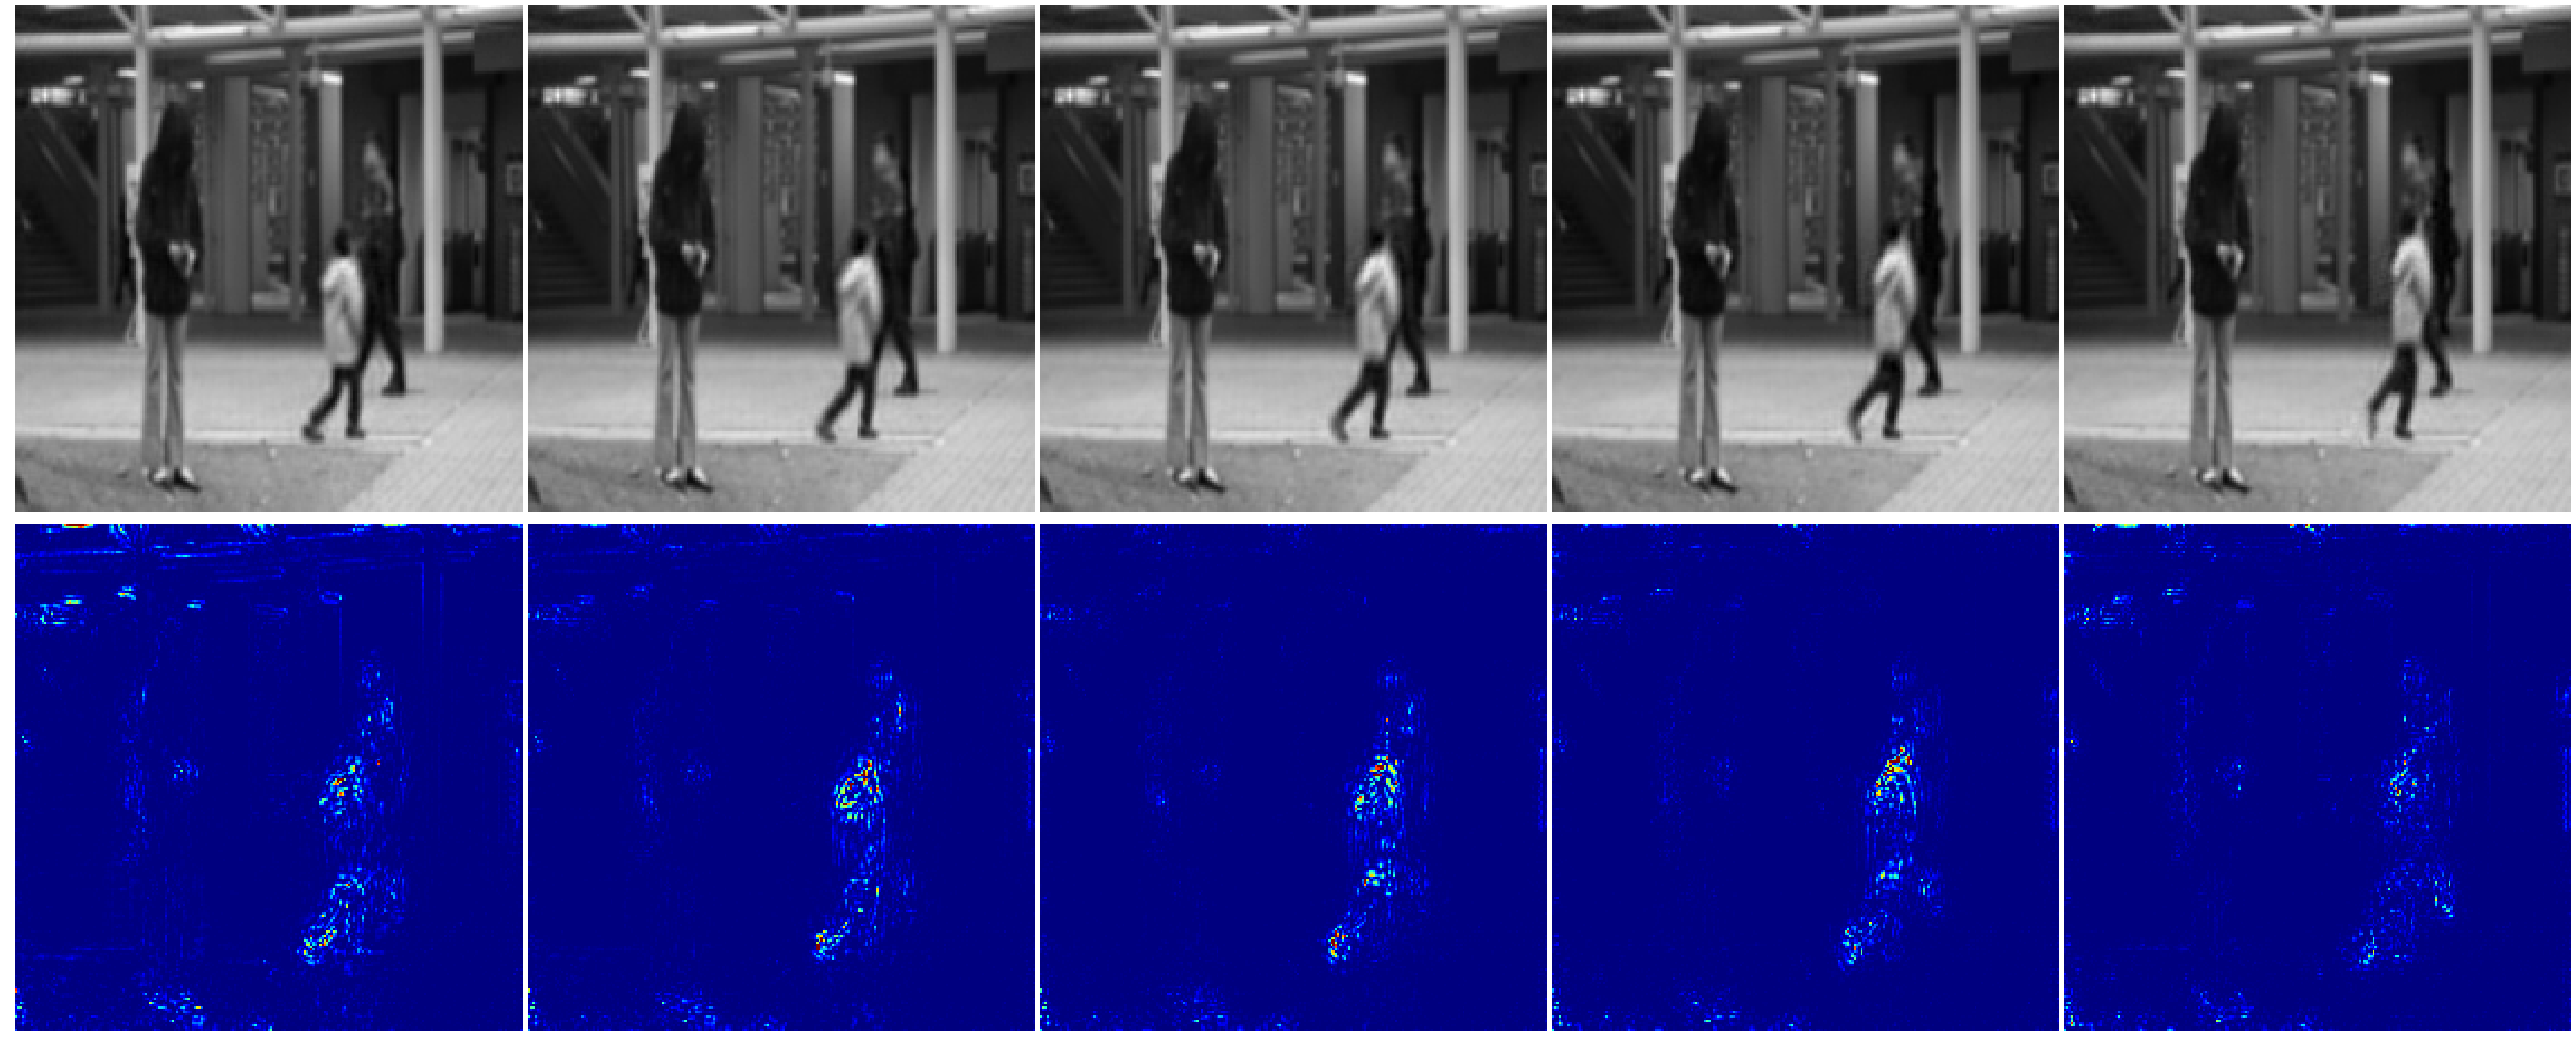

In [7]:
#reconstruction
recons = net.blobs['deconv3'].data
recons = np.reshape(recons,[5,227,227])
error = np.power(gt - recons,2)
# error = np.power(np.reshape(cur_vol,[5,227,227]) - recons,2)
err = np.reshape(error,[5,227*227])
err = np.sqrt(np.sum(err,1))
print(np.sum(err))

plt.figure(figsize=(100,100))
for i in range(5):
    plt.subplot(2,5,i+1)
    input_ = np.reshape(recons[4-i,:,:],[227,227]) 
    plt.imshow(input_,cmap='gray')
    plt.axis('off') 
for i in range(5):
    plt.subplot(2,5,i+6)
    input_ = np.reshape(error[4-i,:,:],[227,227])
#     plt.imshow(input_)
    imgplot = plt.imshow(input_,clim=(0.0,0.01))
    imgplot.set_cmap('jet')
    plt.axis('off') 
plt.subplots_adjust(bottom=0.565,wspace=0.01,hspace=0.00000000001)#for 2 rows
# plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)#for 3 rows
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.01,hspace=0.9)
plt.show()
# plt.savefig('Avenue_run_AE6_seq8fr26-30.jpg')    

In [ ]:
#ICIP (anomaly with bouding box)

In [7]:
#reconstruction
recons = net.blobs['deconv3'].data
recons = np.reshape(recons,[5,227,227])
error = np.power(gt - recons,2)
# error = np.power(np.reshape(cur_vol,[5,227,227]) - recons,2)
err = np.reshape(error,[5,227*227])
err = np.sqrt(np.sum(err,1))
print(np.sum(err))

# for visualization
gt_location = '/usr/not-backed-up/1_DATABASE/Avenue Dataset/Test_gt_location';
with h5py.File(os.path.join(gt_location,'Test%d_gt_location.mat'%(seq))) as f:    
    data = [f[element[0]][:] for element in f['gt_location']]
# data = np.array(data)
import matplotlib.patches as patches
#####################

fig2 = plt.figure(figsize=(100,100))
for i in range(5):
    plt.subplot(3,5,i+1)
    #     input_ = np.reshape(prediction[i,:,:,:,:],[227,227])
    input_ = np.reshape(gt[4-i,:,:],[227,227])
    plt.imshow(input_,cmap='gray')
    plt.axis('off')
for i in range(5):
#     print(i)
    plt.subplot(3,5,i+6)
    input_ = np.reshape(recons[4-i,:,:],[227,227]) 
    plt.imshow(input_,cmap='gray')
    plt.axis('off') 
# for i in range(5):
#     plt.subplot(3,5,i+11)
#     input_ = np.reshape(error[i,:,:],[227,227])
# #     plt.imshow(input_)
#     imgplot = plt.imshow(input_,clim=(0.0,0.02))
#     imgplot.set_cmap('jet')
#     plt.axis('off') 

ax1 = fig2.add_subplot(3,5,11)
input_ = np.reshape(error[4,:,:],[227,227])
ax1.imshow(input_,clim=(0.0,0.01),cmap='jet') 
# gt_fr = np.transpose(data[fr+4],[1,0])
data_ = np.array(data[fr])
gt_fr = np.transpose(data_,[1,0])
for id in range(gt_fr.shape[0]):
    x = gt_fr[id,0]
    y = gt_fr[id,1]
    w = gt_fr[id,2]
    h = gt_fr[id,3]
    rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
    ax1.add_patch(rect)

##############
ax2 = fig2.add_subplot(3,5,12)
input_ = np.reshape(error[3,:,:],[227,227])
ax2.imshow(input_,clim=(0.0,0.01),cmap='jet') 
# gt_fr = np.transpose(data[fr+3],[1,0])
data_ = np.array(data[fr+1])
gt_fr = np.transpose(data_,[1,0])
for id in range(gt_fr.shape[0]):
    x = gt_fr[id,0]
    y = gt_fr[id,1]
    w = gt_fr[id,2]
    h = gt_fr[id,3]
    rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
    ax2.add_patch(rect)
#############
##############
ax3 = fig2.add_subplot(3,5,13)
input_ = np.reshape(error[2,:,:],[227,227])
ax3.imshow(input_,clim=(0.0,0.01),cmap='jet') 
# gt_fr = np.transpose(data[fr+2],[1,0])
data_ = np.array(data[fr+2])
gt_fr = np.transpose(data_,[1,0])
for id in range(gt_fr.shape[0]):
    x = gt_fr[id,0]
    y = gt_fr[id,1]
    w = gt_fr[id,2]
    h = gt_fr[id,3]
    rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
    ax3.add_patch(rect)
#############
##############
ax4 = fig2.add_subplot(3,5,14)
input_ = np.reshape(error[1,:,:],[227,227])
ax4.imshow(input_,clim=(0.0,0.01),cmap='jet') 
# gt_fr = np.transpose(data[fr+1],[1,0])
data_ = np.array(data[fr+3])
gt_fr = np.transpose(data_,[1,0])
for id in range(gt_fr.shape[0]):
    x = gt_fr[id,0]
    y = gt_fr[id,1]
    w = gt_fr[id,2]
    h = gt_fr[id,3]
    rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
    ax4.add_patch(rect)
#############
##############
ax5 = fig2.add_subplot(3,5,15)
input_ = np.reshape(error[0,:,:],[227,227])
ax5.imshow(input_,clim=(0.0,0.01),cmap='jet') 
# gt_fr = np.transpose(data[fr],[1,0])
data_ = np.array(data[fr+4])
gt_fr = np.transpose(data_,[1,0])
for id in range(gt_fr.shape[0]):
    x = gt_fr[id,0]
    y = gt_fr[id,1]
    w = gt_fr[id,2]
    h = gt_fr[id,3]
    rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
    ax5.add_patch(rect)
#############
plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.01,hspace=0.9)
# plt.show()
plt.savefig('avenue_seq3_frame605_recons_0.01.jpg')


7.28351383282
